### Title: Real world Project with python- Police data analysis

![](police.jpg)






* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)


* #### Github Link:[Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiZmVlZDUwMzQtNmVmNS00MjEzLThjMDktOWY2YzgwYzNhZDlhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

#### Introduction

* The following police dataset contains the infomation about different drivers, with different races that were arrested, almost arrested after having commited certain crimes such as speeding and so forth


* The data is a csv file and analysis is done using pandas 

* The data will be saved and exported to power bi for good visualisations

* matplotlib will be used for some data visualisations to get the inisghts of the data

#### Questions to answer

These Questions will be answered under phase3: of the data analysis 
    


* Group the gender race
* how many male and females were arrested
* how many male and females were arrested for speeding
* Does gender affects who gets searched during a stop
* Compare age distrubution for each violation
* Which month had more females arrested for speeding
* How many males were arrested on sunday
* which race had more people arrested for drugs
* which driver age was arrested the most
* Which violation raw had more arrests
* how many people were stopped and  not arrested in each day


They will help in the story telling of in this data

# Phase 1: Data Preparation

This step involves data importation from different sources, libraries import and also the general over view of data to be used is given

In [5]:
import pandas as pd               #for data loading and manipulation

import numpy as np                #for stastical analysis

import matplotlib.pyplot as plt        #for data visualisation
import seaborn as sns

import matplotlib
%matplotlib inline

In [6]:
na_vals = ['nan', 'NaN', ' ', ' missing', 'Missing', 'naN', None]     # a list containing all the values to be deemed as null values

df = pd.read_csv('3. Police Data.csv', na_values=na_vals)

In [7]:
#view the dataset
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [8]:
#view the non null values
df.count()

stop_date             65535
stop_time             65535
country_name              0
driver_gender         61474
driver_age_raw        61481
driver_age            61228
driver_race           61475
violation_raw         61475
violation             61475
search_conducted      65535
search_type            2479
stop_outcome          61475
is_arrested           61475
stop_duration         61475
drugs_related_stop    65535
dtype: int64

lots of null values, they shall be dealt with in the phase 2 of the data analysis

In [9]:
# view the shape of the dataset
df.shape

(65535, 15)

The dataset has 65535 and 15 columns

In [6]:
#check all the column names of the dataset

df.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

# Phase 2: Data Processing


### Step 1: Check for all the the missing or na values in the dataset

In [7]:
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

* There is need to drop the column country_name, also drop the column search type because the entire column seem to have only null values
* other rows might be havin same na values in the same rows hence drop the values

In [8]:
#drop the columns with na_values

df.drop(columns = ['country_name', 'search_type'], inplace=True)

In [9]:
#drop all the rows with na_values
df.dropna(axis='index', how='all', subset=['driver_gender', 'violation', 'is_arrested'], inplace= True)

In [10]:
#check the missing columns again
df.isnull().sum()

stop_date               0
stop_time               0
driver_gender           1
driver_age_raw          1
driver_age            252
driver_race             0
violation_raw           0
violation               0
search_conducted        0
stop_outcome            0
is_arrested             0
stop_duration           0
drugs_related_stop      0
dtype: int64

In [11]:
#fill the driver age with mean values
ave_age = df['driver_age'].mean(axis=0)
df['driver_age'].fillna(ave_age, inplace=True)

In [12]:
#fill the driver gender with the mode value, that is the most appearing value
#check the gender with the most value
df['driver_gender'].value_counts()

M    45164
F    16310
Name: driver_gender, dtype: int64

Male has that hence fill the na with the male values

In [13]:
df['driver_gender'].fillna('M', inplace = True)

In [14]:
#check for the mode in the column
df['driver_age_raw'].value_counts()

1986.0    2702
1987.0    2645
1985.0    2629
1988.0    2587
1983.0    2339
          ... 
2000.0       1
8801.0       1
2002.0       1
2011.0       1
1918.0       1
Name: driver_age_raw, Length: 93, dtype: int64

In [15]:
#fill the driver age raw with the mode value, that is the most appearing value
#check the age raw with the most value

df['driver_age_raw'].fillna(1986, inplace = True)

In [16]:
#check again the missing values
df.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

now the data is clean from missing values

### Step2: check for duplicates in the dataset

In [17]:
df.duplicated().sum()

183

183 rows of data have duplicates

In [18]:
#drop duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

the number of rows have been reduced by 183 rows

### Step 3: Check for the datatypes in the dataset to see if there is need to change the datatypes of some columns

In [19]:
#view the dataset
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [20]:
df.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [21]:
#Merge the columns and change the object data type in stop_date and stop_time to datetime

df['arrested_day'] = df['stop_date'] + ' '+ df['stop_time'] 
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2/20/2005 17:15
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,3/14/2005 10:00


In [22]:
#convert the newly created column to datetime
df['stopped_day'] = pd.to_datetime(df['stop_date'])  
df.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
arrested_day                  object
stopped_day           datetime64[ns]
dtype: object

the arrested date has been properly put into datetime datatype

In [23]:
#drop stop date and stop time
df.drop(columns=['stop_date'], inplace=True)

In [24]:
#view the dataset
df.head()

,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day
0,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02
1,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18
2,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15,2005-01-23
3,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2/20/2005 17:15,2005-02-20
4,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,3/14/2005 10:00,2005-03-14


the columns have been dropped

#### step 3.1: create a seperate column for years, months and day names 

In [25]:
df['year'] = df['stopped_day'].dt.year
df['month'] = df['stopped_day'].dt.month
df['day_of_Week'] = df['stopped_day'].dt.day_name()

#view the dataframe
df.head()

,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week
0,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,1,Sunday
1,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,1,Tuesday
2,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15,2005-01-23,2005,1,Sunday
3,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2/20/2005 17:15,2005-02-20,2005,2,Sunday
4,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,3/14/2005 10:00,2005-03-14,2005,3,Monday


The columns have been created

#### step 3.2: change the value names of months into actual month names

In [26]:
df['month'] = df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                  11:'Nov', 12:'Dec'})

#renaming the values of the month into actual months

df.head()

,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week
0,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,Jan,Sunday
1,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,Jan,Tuesday
2,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15,2005-01-23,2005,Jan,Sunday
3,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2/20/2005 17:15,2005-02-20,2005,Feb,Sunday
4,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,3/14/2005 10:00,2005-03-14,2005,Mar,Monday


### Step 4: Make the Data more understandable in columns

In [27]:
# check all the unique values that can be replaced for marital status
df['driver_gender'].unique()

array(['M', 'F'], dtype=object)

M is for male and F is for female

In [28]:
df['driver_gender'].replace({'M': 'Male', 'F': 'Female'},inplace=True)


###  Step 5: renaming the columns

In [29]:
df.rename(columns={'driver_age_raw':'Driver_date_of_birth'}, inplace=True)

In [30]:
#check the dataframe
df.head()

,stop_time,driver_gender,Driver_date_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week
0,1:55,Male,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,Jan,Sunday
1,8:15,Male,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,Jan,Tuesday
2,23:15,Male,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15,2005-01-23,2005,Jan,Sunday
3,17:15,Male,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2/20/2005 17:15,2005-02-20,2005,Feb,Sunday
4,10:00,Female,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,3/14/2005 10:00,2005-03-14,2005,Mar,Monday


In [31]:
df.head(3)

,stop_time,driver_gender,Driver_date_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week
0,1:55,Male,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,Jan,Sunday
1,8:15,Male,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,Jan,Tuesday
2,23:15,Male,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15,2005-01-23,2005,Jan,Sunday


### Remove the ranges in stop_duration column and find its average

In [32]:
#first split the column with space as the seperator 

# splitting can be done in 2 ways

#df[['Duration_mins', 'Units']] = df['stop_duration'].str.split(' ', expand =True)        #-first way to do it uncheck the comment and run it

df['stop_duration_mins'] = df['stop_duration'].apply(lambda x: x.split(' ')[0])      #second method, [0] grabs the first column

In [33]:
df.head()

,stop_time,driver_gender,Driver_date_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week,stop_duration_mins
0,1:55,Male,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,Jan,Sunday,0-15
1,8:15,Male,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,Jan,Tuesday,0-15
2,23:15,Male,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15,2005-01-23,2005,Jan,Sunday,0-15
3,17:15,Male,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2/20/2005 17:15,2005-02-20,2005,Feb,Sunday,16-30
4,10:00,Female,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,3/14/2005 10:00,2005-03-14,2005,Mar,Monday,0-15


In [34]:
#write a function that check the duration_mins columns and calculates the average

def convert_ave(x):
    numbers = x.split('-')
    if len(numbers) == 2:
        return(float(numbers[0]) + float(numbers[1])) / 2
    try:
        return float(x)
     
    except:
        return None

In [35]:
#pass in the function into the column duration mins
df['stop_duration_mins'] = df['stop_duration_mins'].apply(convert_ave)

In [36]:
df.head()

,stop_time,driver_gender,Driver_date_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week,stop_duration_mins
0,1:55,Male,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,Jan,Sunday,7.5
1,8:15,Male,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,Jan,Tuesday,7.5
2,23:15,Male,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15,2005-01-23,2005,Jan,Sunday,7.5
3,17:15,Male,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2/20/2005 17:15,2005-02-20,2005,Feb,Sunday,23.0
4,10:00,Female,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,3/14/2005 10:00,2005-03-14,2005,Mar,Monday,7.5


In [37]:
df['stop_duration_mins'].value_counts()

7.5     47264
23.0    11403
2.0         1
Name: stop_duration_mins, dtype: int64

In [38]:
#view the dataframe
df.head()

,stop_time,driver_gender,Driver_date_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week,stop_duration_mins
0,1:55,Male,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,Jan,Sunday,7.5
1,8:15,Male,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,Jan,Tuesday,7.5
2,23:15,Male,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/23/2005 23:15,2005-01-23,2005,Jan,Sunday,7.5
3,17:15,Male,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2/20/2005 17:15,2005-02-20,2005,Feb,Sunday,23.0
4,10:00,Female,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,3/14/2005 10:00,2005-03-14,2005,Mar,Monday,7.5


# Phase 3: Exploratory Data Analysis

* EDA is an approach to anaylse data inorder to summarize main characteristics of the data
* It also helps to gain better understanding of the dataset
* helps uncover relationships between different variables 
* extract the important variables for the problem being solved

#### Q1: Group the gender race

In [39]:
#view the dataset
df.head(2)

,stop_time,driver_gender,Driver_date_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week,stop_duration_mins
0,1:55,Male,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,Jan,Sunday,7.5
1,8:15,Male,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,Jan,Tuesday,7.5


In [40]:
df.groupby('driver_race').driver_gender.value_counts()

driver_race  driver_gender
Asian        Male              1270
             Female             366
Black        Male              6615
             Female            1628
Hispanic     Male              4581
             Female            1012
Other        Male               188
             Female              22
White        Male             32369
             Female           13241
Name: driver_gender, dtype: int64

#### Q2: how many male and females were arrested

In [41]:
filt = (df['is_arrested'] == True)
df[filt].driver_gender.value_counts()

Male      1775
Female     458
Name: driver_gender, dtype: int64

#### Q3: how male and females were arrested for speeding

In [42]:
#view the dataset
df.head(2)

,stop_time,driver_gender,Driver_date_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,arrested_day,stopped_day,year,month,day_of_Week,stop_duration_mins
0,1:55,Male,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/2/2005 1:55,2005-01-02,2005,Jan,Sunday,7.5
1,8:15,Male,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1/18/2005 8:15,2005-01-18,2005,Jan,Tuesday,7.5


In [43]:
filt = (df['violation'] == 'Speeding') & (df['is_arrested'] == True)
df[filt].driver_gender.value_counts()

Male      464
Female     81
Name: driver_gender, dtype: int64

more males were arrested for speeding

#### Q4: Does gender who gets searched during a stop

In [44]:
filt = (df['search_conducted']== True)
df[filt].driver_gender.value_counts()

Male      2105
Female     365
Name: driver_gender, dtype: int64

yes! male were searched to a greater extent

#### Q5: Compare age distrubution for each violation

In [45]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6498.0,31.685956,11.376163,16.0,23.0,28.0,38.75,81.0
Moving violation,11894.0,36.731333,13.232118,15.0,25.0,35.0,46.00,86.0
Other,3569.0,40.208978,12.603789,16.0,30.0,40.0,50.00,86.0
Registration/plates,2225.0,32.654134,11.144344,16.0,24.0,30.0,40.00,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.00,42.0
Speeding,37103.0,33.271098,12.604607,15.0,23.0,30.0,42.00,88.0


violation of speeding was dominated by people at the average age of 33, as 30 year olds contributed to the seatbelt violation and so forth

#### Q6: Which month had more females arrested for speeding

In [46]:
filt = (df['driver_gender'] == 'Female')  & (df['violation'] == 'Speeding')
df[filt].month.value_counts()

Jan    1126
Nov    1114
Oct    1042
Apr    1023
Mar    1001
May     997
Jun     948
Feb     915
Sep     890
Aug     888
Jul     877
Dec     840
Name: month, dtype: int64

Jan had lots of females being arrested for speeding the least being December

#### Q7: How many people were arrested on sunday

In [47]:
filt = (df['day_of_Week'] ==  'Sunday') & (df['is_arrested']==True) & (df['driver_gender'] == 'Male')
df.loc[filt, 'driver_gender'].count()

269

269 male were arrested on sunday

#### Q8: which race had more people arrested for drugs

In [48]:
filt = (df['is_arrested']==True) & (df['drugs_related_stop']==True)
df[filt].driver_race.value_counts()

White       107
Black        39
Hispanic     19
Asian         1
Name: driver_race, dtype: int64

whites ahd more drugs issues than the rest

#### Q9: which driver age was arrested the most

In [49]:
filt = (df['is_arrested']==True)
df[filt].driver_age.value_counts()

27.0    116
24.0    112
22.0    112
25.0    109
23.0    106
       ... 
67.0      1
63.0      1
76.0      1
69.0      1
78.0      1
Name: driver_age, Length: 61, dtype: int64

age of 27 had more arrests than the rest

#### Q10: Which violation raw had more arrests

In [50]:
filt = (df['is_arrested']==True) 
df[filt].violation_raw.value_counts()

Other Traffic Violation             703
Speeding                            545
Equipment/Inspection Violation      467
Registration Violation              268
Call for Service                    182
APB                                  17
Special Detail/Directed Patrol       14
Suspicious Person                    13
Violation of City/Town Ordinance     11
Motorist Assist/Courtesy              8
Warrant                               5
Name: violation_raw, dtype: int64

other traffic violations had more arrest the last being warrant

59059 people were stopped but they werent arrested

# Phase 4: Data Visualisation

* The purpose of data visualization is to visually represent data in a way that allows people to quickly and easily understand patterns, relationships, and trends in the data. By creating visual representations of data, we can make complex information more accessible and understandable, which can lead to insights and actionable outcomes.

### 4.1: Gender of drivers arrested for speeding

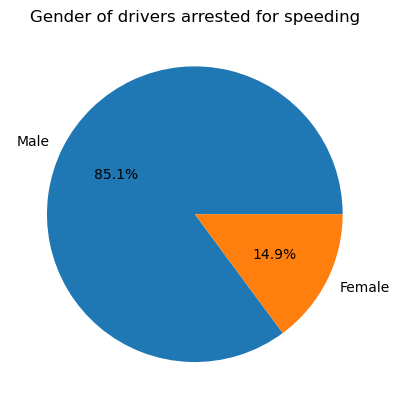

In [55]:


# create a filtered dataframe
filt = (df['violation'] == 'Speeding') & (df['is_arrested'] == True)
df_filtered = df[filt]

# count the number of drivers by gender
gender_counts = df_filtered.driver_gender.value_counts()

# create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# add title
plt.title('Gender of drivers arrested for speeding')

# show the chart
plt.show()


##### * **key takeaway:**  more male drivers were arrested because of speeding

### 4.2: Number of drivers searched by gender

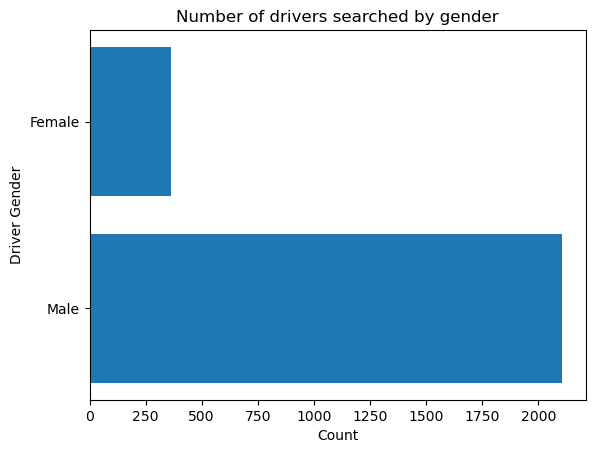

In [56]:


# create a filtered dataframe
filt = (df['search_conducted'] == True)
df_filtered = df[filt]

# count the number of drivers searched by gender
gender_counts = df_filtered.driver_gender.value_counts()

# create a horizontal bar chart
plt.barh(gender_counts.index, gender_counts)

# add labels and title
plt.xlabel('Count')
plt.ylabel('Driver Gender')
plt.title('Number of drivers searched by gender')

# show the chart
plt.show()


##### * **key takeaway:**  more male drivers were searched after being caught

### 4.3: 'Female drivers caught speeding by month

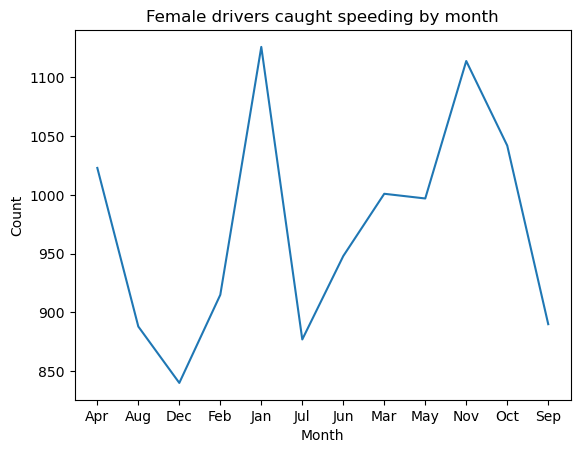

In [57]:
import matplotlib.pyplot as plt

# create a filtered dataframe
filt = (df['driver_gender'] == 'Female')  & (df['violation'] == 'Speeding')
df_filtered = df[filt]

# count the number of female drivers caught speeding in each month
month_counts = df_filtered.month.value_counts()

# sort the data by month
month_counts = month_counts.sort_index()

# create a line chart
plt.plot(month_counts.index, month_counts)

# add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Female drivers caught speeding by month')

# show the chart
plt.show()


##### * **key takeaway:**  more female drivers were caught speeding in Jan

### 4.4: Male drivers arrested on Sundays

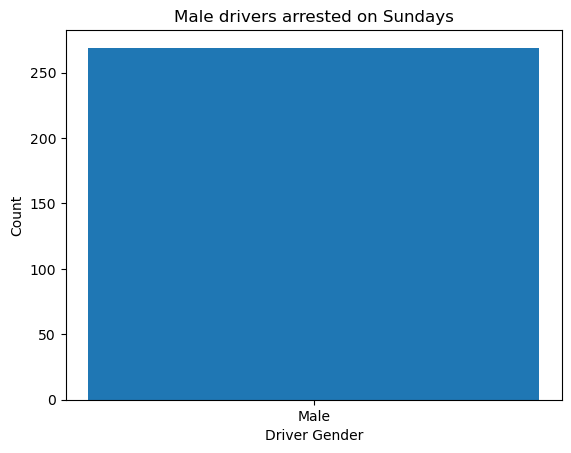

In [61]:
import matplotlib.pyplot as plt

# create a filtered dataframe
filt = (df['day_of_Week'] == 'Sunday') & (df['is_arrested'] == True) & (df['driver_gender'] == 'Male')
df_filtered = df.loc[filt]

# count the number of male drivers arrested on Sundays
male_arrested_count = df_filtered.driver_gender.count()

# create a bar chart
plt.bar(['Male'], [male_arrested_count])

# add labels and title
plt.xlabel('Driver Gender')
plt.ylabel('Count')
plt.title('Male drivers arrested on Sundays')

# show the chart
plt.show()


##### * **key takeaway:**  more than 250 males were arrested on sundays

### 4.5: Number of Searches Conducted by Gender

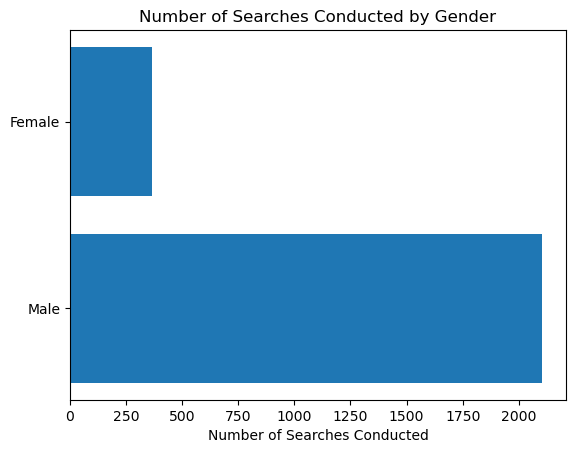

In [51]:

data = df[df['search_conducted'] == True]['driver_gender'].value_counts()

# Plot the data as a horizontal bar chart
plt.barh(data.index, data.values)
plt.xlabel('Number of Searches Conducted')
plt.title('Number of Searches Conducted by Gender')

plt.show()


##### * **key takeaway:**  more males were searched than females when stopped

### 4.6: Number of Arrests Made by Gender

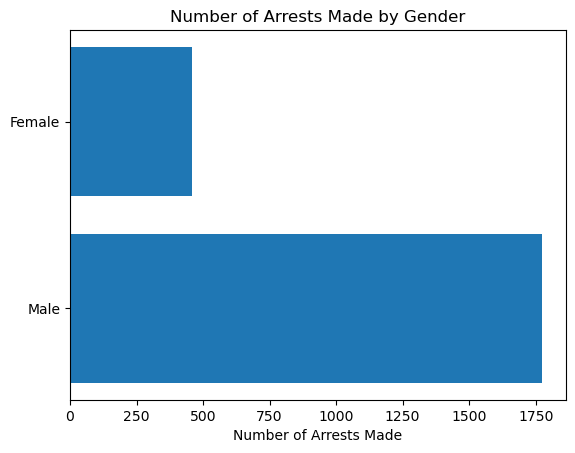

In [52]:

data = df[df['is_arrested'] == True]['driver_gender'].value_counts()

# Plot the data as a horizontal bar chart
plt.barh(data.index, data.values)
plt.xlabel('Number of Arrests Made')
plt.title('Number of Arrests Made by Gender')

plt.show()


##### * **key takeaway:**  more males were arrested han females

#### Further data Visualization was done in powerbi:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiZmVlZDUwMzQtNmVmNS00MjEzLThjMDktOWY2YzgwYzNhZDlhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

In [10]:
#saving the dataset for more vizualisation
df.to_csv(r"C:\Users\Tamie\Downloads\python data science projects\datasets\cleaned police")

## Author: TamiriraIshe Nyevera

## Date: 25 January 2023

* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)

* #### Github link:[Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiZmVlZDUwMzQtNmVmNS00MjEzLThjMDktOWY2YzgwYzNhZDlhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)